# Linear regression revisited

From this section, we will learn how we go into the Gaussian processes from the linear regression model.

1. <div style='background-color:#e0f0ff'>Here is a general linear regression model.
$$y(\mathbf{x}) = \mathbf{w}^T\phi(\mathbf{x}) \tag{6.49}$$
where $\mathbf{w}$ is a $M$-dimensional weight vector and $\phi(\mathbf{x})$ is also a $M$-dimensional basis vector.</div>
2. <div style='background-color:#f0e0ff'>Now we consider a prior distribution over $\mathbf{w}$ that is given by an isotropic Gaussian of the form
$$p(\mathbf{w}) = \mathcal{N}(\mathbf{w}|0, \alpha^{-1}I) \tag{6.50}$$
For specific $\mathbf{x}$, $y(\mathbf{x})$ is also a Gaussian distributed variable because it is the linear combination of Gaussian variables.</div>
3. <div style='background-color:#fff0e0'>In practice, we are given a training data set at the training data points $\mathbf{X} = (\mathbf{x}_1,\cdots,\mathbf{x}_N)^T$. We are therefore interested in the joint distribution of the function values $\mathbf{y} = (y_1,\cdots, y_N)^T$, where $y_n = y(\mathbf{x}_n)$. This vector is given by
$$\mathbf{y} = \Phi \mathbf{w}\quad \text{where}\quad \Phi = \big(\phi(\mathbf{x}_1),\cdots, \phi(\mathbf{x})_N\big)^T\tag{6.51}$$
Here, $\mathbf{y}$ is a vector whose elements are random variables at different points. This vector is derived by a joint probability density function denoted by $p\big(y_1, \cdots, y_N\big)$. This joint distribution is still Gaussian because its marginal distributions $p(y_n)$ are all Gaussian.</div>
4. <div style='background-color:#f0ffe0'>High dimensional Gaussian is determined by the mean and covariance.  
$$\color{red}{\begin{align*}
\mathbb{E}[\mathbf{y}] &= \Phi\mathbb{E}[\mathbf{w}] = (0,\cdots,0)^T \tag{6.52}\\
\text{cov}[\mathbf{y}] &= \mathbb{E}\big[(\mathbf{y}-\mathbb{E}[\mathbf{y}])(\mathbf{y}-\mathbb{E}[\mathbf{y}])^T\big]=\mathbb{E}[\mathbf{y}\mathbf{y}^T] = \Phi\mathbb{E}[\mathbf{w}\mathbf{w}^T]\Phi^T = \frac{1}{\alpha}\Phi\Phi^T = \mathbf{K} \tag{6.53}
\end{align*}}$$
where $\mathbf{K}$ is the Gram matrix with elements
$$\color{red}{K_{nm} = k(\mathbf{x}_n, \mathbf{x}_m) = \frac{1}{\alpha}\phi(\mathbf{x}_n)^T\phi(\mathbf{x}_m) \tag{6.54}}$$
and $k(\mathbf{x},\mathbf{x}')$ is the kernel function.</div>
5. <div style='background-color:#ffe0f0'>In this case, $y(\mathbf{x})$ is said to be a Gaussian process, because $y(\mathbf{x})$ is a Gaussian distributed random variable at arbitrary point of $\mathbf{x}$.</div>

In general, a Gaussian process is defined as a probability distribution over functions $y(\mathbf{x})$ such that the set of values of $y(\mathbf{x})$ evaluated at an arbitrary set of points $\mathbf{x}_1,\cdots,\mathbf{x}_N$ jointly have a Gaussian distribution. 

In most applications, we will not have any prior knowledge about the mean of $y(\mathbf{x})$ and so by symmetry we take it to zero. This is equivalent to choosing the mean of the prior over weight values $p(\mathbf{w}|\alpha)$ to be zero in the basis function viewpoint.

For evaluating $y(\mathbf{x})$, we would rather wish to know the relationship among different points, which are given by $cov[\mathbf{y}]$. And this relationship will determine the form of $y(\mathbf{x})$ eventually.

------------

# Add the noise

The vector $\mathbf{y}$ we discussed above is just about $y(\mathbf{x})$ itself. Here we need to take account of the noise on the observed target values, which are given by

$$t_n = y_n + \epsilon_n \tag{6.57}$$

Here we shall consider noise at each point have a Gaussian distribution, so that

$$p(t_n|y_n) = \mathcal{N}(t_n|y_n, \beta^{-1}) \tag{6.58}$$

where $\beta$ is a hyperparameter representing the precision of the noise. And because the noise is independent for each data point, the noise process is therefore given by an isotropic Gaussian

$$\left.\begin{array}{ll}
p(\mathbf{t}|\mathbf{y}) = \mathcal{N}(\mathbf{t}|\mathbf{y}, \beta^{-1}I_n) & (6.59)\\
p(\mathbf{y}) = \mathcal{N}(\mathbf{y}|0, \mathbf{K}) &(6.60)\\
p(\mathbf{t}) = \int p(\mathbf{t}|\mathbf{y})p(\mathbf{y})d\mathbf{y} &(6.61)
\end{array}\right\}
\overset{(2.115)}{\Rightarrow} p(\mathbf{t}) = \mathcal{N}(\mathbf{t}|0, \mathbf{C})\quad \text{where}\quad C(\mathbf{x}_n,\mathbf{x}_m)=k(\mathbf{x}_n,\mathbf{x}_m)+\beta^{-1}\delta_{nm} \tag{6.62}$$

where $\delta_{nm}=\left\{\begin{array}{ll}1 &n=m\\ 0 &\text{otherwise}\end{array}\right.$. The covariances are simply added due to independence.

---------------

# Widely used kernel function
We mentioned in Section 6.2 that we can construct kernel with various of techniques. However, here is a common used kernel function.

$$k(\mathbf{x}_n, \mathbf{x}_m) = \underbrace{\theta_0 exp\left\{-\frac{\theta_1}{2}\|\mathbf{x}_n-\mathbf{x}_m\|^2\right\}}_{non-linear} + \underbrace{\theta_2}_{bias} + \underbrace{\theta_3\mathbf{x}_n^T\mathbf{x}_m}_{linear} \tag{6.63}$$
where $\mathbf{\theta} = (\theta_0,\theta_1,\theta_2,\theta_3)^T$ are the hyperparameters.

----------------

# Predictive Distribution

Now we shall use the obtained Gaussian process to predict the new value $t_{N+1}$ and its probability $p(t_{N+1}|\mathbf{t})$ at the point $\mathbf{x}_{N+1}$.

For the reason that $t_{N+1}$ is also one point in the Gaussian process, we can write down the joint distribution of $\mathbf{t}_{N+1} = (t_1,\cdots, t_N, t_{N+1})^T$ as $p(\mathbf{t}_{N+1})$ which is a multivariate Gaussian. By making use of the results from Section 2.3.1, we obtain the covariance of the multivariate Gaussian $p(\mathbf{t}_{N+1})$. 

$$\left.\begin{array}{ll}
\mathbf{t} &= (t_1,\cdots,t_N)^T\\
\mathbf{t}_{N+1} &= (t_1,\cdots, t_N,t_{N+1})^T\\
p(\mathbf{t}) &= \mathcal{N}(\mathbf{t}|0,\mathbf{C}_N)\\
p(\mathbf{t}_{N+1}) &= \mathcal{N}(\mathbf{t}_{N+1}|0, \mathbf{C}_{N+1})\\
\end{array}\right\}\overset{Section\ 2.3.1 }{\Rightarrow}
\mathbf{C}_{N+1} = \begin{bmatrix}\mathbf{C}_N & \mathbf{k}\\ \mathbf{k}^T & c\end{bmatrix} \tag{6.65}
$$

where $\mathbf{C}_{N+1}$ has the same form as $\mathbf{C}_N$. Thus

$$\mathbf{C}_{N+1}(\mathbf{x}_n,\mathbf{x}_m) = k(\mathbf{x}_n,\mathbf{x}_m)+\beta^{-1}\delta_{nm}
\Rightarrow
\left\{\begin{array}{ll}
\mathbf{k} = (k_1,\cdots,k_{N})^T\quad\text{where}\quad k_n = k(\mathbf{x}_n, \mathbf{x}_{N+1})\\
c = k(\mathbf{x}_{N+1},\mathbf{x}_{N+1})+\beta^{-1}
\end{array}\right.$$

With this result, we can use the equations (2.81) and (2.82) to derive the conditional distribution

$$\bbox[#e0f0ff]{p(t_{N+1}|\mathbf{t}) = \mathcal{N}(t_{N+1}|m, \sigma^2)\quad \text{where}\quad 
\left\{\begin{array}{ll}
m &= \mathbf{k}^T\mathbf{C}_N^{-1}\mathbf{t} & (6.66)\\
\sigma^2 &= c-\mathbf{k}^T\mathbf{C}_{N}^{-1}\mathbf{k} &(6.67)
\end{array}\right.}$$

Recall that, in Section 6.2, we discussed that the kernel function $k(\mathbf{x},\mathbf{x}')$ can be constructed using various of techniques. The only restriction is that the covariance matrix $\mathbf{C}_N$ given by (6.62) must be positive definite.


<font color='#bbbbbb'>
Note that the mean (6.66) of the predictive distribution can be written, as a function of $\mathbf{x}_{N+1}$, in the form

$$m(\mathbf{x}_{N+1}) = \sum_{n=1}^N a_n k(\mathbf{x}_n, \mathbf{x}_{N+1}) \tag{6.68}$$

where $a_n$ is the $n^{th}$ component of $\mathbf{C}_N^{-1}\mathbf{t}$. Thus, if the kernel function $k(\mathbf{x}_n,\mathbf{x}_m)$ depends only on the distance $\|\mathbf{x}_n-\mathbf{x}_m\|$, then we obtain an **expansion** in radial basis functions.
</font>

---------------

# Performance

The central computational operation in using Gaussian processes will involve the inversion of a matrix $\mathbf{C}_N$ of size $N\times N$, for which stardard methods require $O(N^3)$ computations. By contrast, in the basis function model we have to invert a matrix $S_{N}$ of size $M\times M$, which is $O(M^3)$ computational complexity. If the number $M$ of basis functions is smaller than the number $N$ of data points, it will be computational more efficient to work in the basis function frame work.


-----------------

# Learning the hyperparameters

The prediction of Gaussian process model will depend, in part, on the choice of covariance function. In practice, rather than fixing the 





---------------

# Automatic relevance determination

theta = [56.42952261 59.59849514 36.5428274  35.54260546]


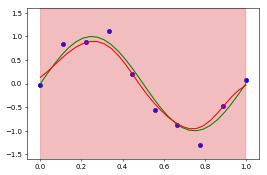

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

# convert warnings to error
warnings.filterwarnings("error")

sigma = 0.1
noise_sigma = 0.2

# avoid over-fitting
# add noise
BETA = (noise_sigma**2)**(-1)
# BETA = 0
# early stopping
ITERATE_COUNTS = 1000

N = 10

kernel = lambda theta, xn, xm: theta[0]*np.exp(-theta[1]/2 * (xn-xm)**2) + theta[2] + theta[3]*xn*xm

A = None
F = None
def Adam(derivatives):
    a0 = 0.1
    rf = 0.9
    r = 0.999
    global A, F
    if A is None:
        A = np.full(derivatives.shape, 0)
        F = np.full(derivatives.shape, 0)
    A = r*A + (1-r)*derivatives**2
    F = rf*F + (1-rf)*derivatives
    at = a0 * (np.sqrt(1-r)/(1-rf))
    return -at/(np.sqrt(A)+1e-8)*F

def gen_convariance(X, theta):
    l = len(X)
    CN = np.zeros((l, l))
    for i in range(l):
        for j in range(l):
            CN[i][j] = kernel(theta, X[i], X[j])
            if i==j:
                CN[i][j] += BETA
    return CN

def partial_derivatives(X, theta, i):
    l = len(X)
    DCN = np.zeros((l, l))
    if i==0:
        for i in range(l):
            for j in range(l):
                DCN[i][j] = np.exp(-theta[1]/2 * (X[i]-X[j])**2)
    elif i==1:
        for i in range(l):
            for j in range(l):
                DCN[i][j] = theta[0] * (-1/2 * (X[i]-X[j])**2) * np.exp(-theta[1]/2 * (X[i]-X[j])**2)
    elif i==2:
        DCN = np.ones((l, l))
    elif i==3:
        for i in range(l):
            for j in range(l):
                DCN[i][j] = X[i] * X[j]
    return DCN

# Learning the hyperparameters
def hyperparameter_optmization(X, T):
    theta = np.random.normal(0, 1, 4)   
    derivatives = np.zeros(4)
    for j in range(ITERATE_COUNTS):
        CN = gen_convariance(X, theta)
        ICN = np.linalg.inv(CN)
        for i in range(4):
            DCN = partial_derivatives(X, theta, i)
            derivatives[i] = -1/2*np.trace(ICN @ DCN) + 1/2* T @ ICN @ DCN @ ICN @ T
        if np.allclose(derivatives, 0):
            print("stationary point found!!!")
            break
        theta += Adam(derivatives)
    return theta

def main():
    fig = plt.figure(figsize=(6,4), dpi=50)
    ax = fig.add_subplot(1,1,1)
    ax.set_ylim(-1.6, 1.6)
    
    #xn = np.random.uniform(0, 1, N)
    xn = np.linspace(0, 1, N)
    noise = np.random.normal(0, noise_sigma, N)
    tn = np.sin(2*np.pi*xn)+noise
    lx = np.linspace(0, 1, 30)
    ly = np.sin(2*np.pi*lx)
    
    ax.plot(lx, ly, 'g')
    ax.scatter(xn, tn, color='b')
    
    theta = hyperparameter_optmization(xn, tn)
    print("theta =", theta)
    CN = gen_convariance(xn, theta)
    ICN = np.linalg.inv(CN)
    
    y = np.zeros(ly.shape)
    std = np.zeros(ly.shape)
    for i in range(len(lx)):
        k = kernel(theta, lx[i], xn)
        y[i] = k@ICN@tn
        
        c = kernel(theta, lx[i], lx[i])
        var = c - k@ICN@k
        if var < 0:
            print(var)
            var = 0
        std[i] = np.sqrt(var)
    #print(std)
    ax.plot(lx, y, 'r')
    ax.fill_between(lx, y-std, y+std, color='C3', alpha=0.3)
    plt.show()

if __name__=="__main__":
    main()